In [1]:
#https://www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, AlphaDropout
#from keras.wrappers.scikit_learn import 
from scikeras.wrappers import KerasClassifier
#from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import AveragePooling1D
from keras.utils import plot_model

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [5]:
columns = ['sedentary', 'LPA', 'MPA', 'VPA', 'steps', 'active']
df = pd.read_csv("/Users/fatemeh/Thises/exprimentalResult/ActivityClassification/PMData_Analysis/Classification/2/PMData_features_vector.csv")
df = df[columns]

X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [6]:
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)

dummy_y = to_categorical(encoded_Y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42, stratify=dummy_y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1800, 5) (450, 5) (1800, 5) (450, 5)


In [8]:
# define model
# create model
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary())
dot_img_file1 = 'model_1.png'
plot_model(model, to_file = dot_img_file1, show_shapes=True, show_layer_names=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,405 (9.39 KB)

 Trainable params: 2,405 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
print(X_train.shape)
print(y_train.shape)
history = model.fit(X_train, y_train, verbose=0, epochs=2500, validation_split = 0.05, callbacks = [rlrop])

(1800, 5)
(1800, 5)


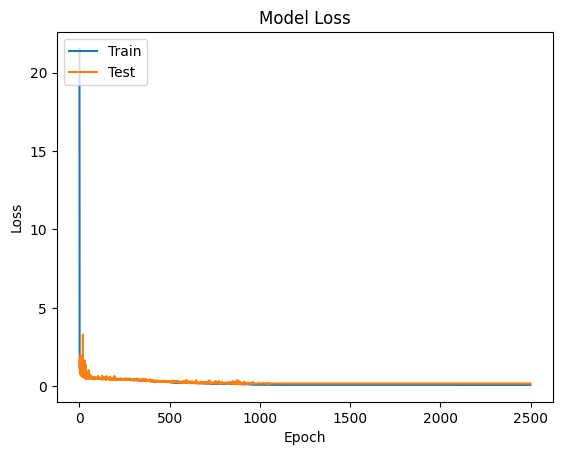

In [10]:
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('mlp_pmdata.png', dpi=300)
plt.show()

In [11]:
predict_x=model.predict(X_test) 
y_pred_class=np.argmax(predict_x,axis=1)

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_class, y_pred_class)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


array([[106,   0,   0,   0,   0],
       [  0,  49,   5,   0,   0],
       [  0,   1,  54,   1,   0],
       [  0,   0,   1,  50,   6],
       [  0,   0,   0,   1, 176]])

In [12]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.98      0.91      0.94        54
           2       0.90      0.96      0.93        56
           3       0.96      0.88      0.92        57
           4       0.97      0.99      0.98       177

    accuracy                           0.97       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.97      0.97      0.97       450



In [13]:
#print(roc_auc_score(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

print(precision_score(y_test_class, y_pred_class, average='micro'))
print(confusion_matrix(y_test_class, y_pred_class))
print(recall_score(y_test_class, y_pred_class, average='micro'))

[[106   0   0   0   0]
 [  0  49   5   0   0]
 [  0   1  54   1   0]
 [  0   0   1  50   6]
 [  0   0   0   1 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.98      0.91      0.94        54
           2       0.90      0.96      0.93        56
           3       0.96      0.88      0.92        57
           4       0.97      0.99      0.98       177

    accuracy                           0.97       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.97      0.97      0.97       450

0.9666666666666667
[[106   0   0   0   0]
 [  0  49   5   0   0]
 [  0   1  54   1   0]
 [  0   0   1  50   6]
 [  0   0   0   1 176]]
0.9666666666666667


In [14]:
print(accuracy_score(y_test_class, y_pred_class))

0.9666666666666667


In [15]:
print(f1_score(y_test_class, y_pred_class, average='micro'))

0.9666666666666667


In [16]:
print(matthews_corrcoef(y_test_class, y_pred_class))

0.9552778034712397


In [17]:
cf_matrix = confusion_matrix(y_test_class, y_pred_class)

Text(50.722222222222214, 0.5, 'Actual values ')

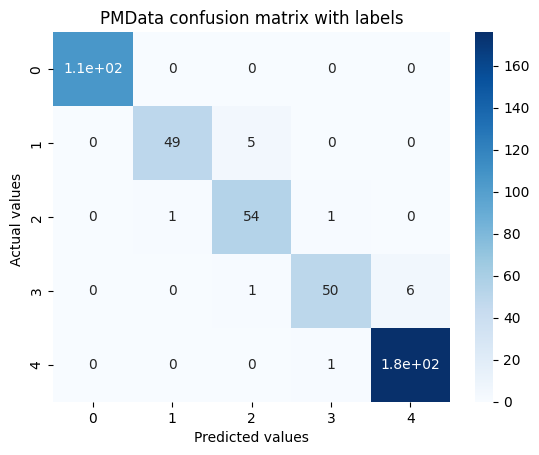

In [18]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues') 
ax.set_title('PMData confusion matrix with labels') 
ax.set_xlabel('Predicted values') 
ax.set_ylabel('Actual values ')

In [19]:
fig = ax.get_figure()
fig.savefig('mlp_pmdata_confusion.png', dpi=300)